# We Demonstrate how to load in and plot the DM density profiles:

In [16]:
#load in necessary packages
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
import astropy.constants as const

import os
from scipy.signal import savgol_filter

In [ ]:
#Helper functions to load in the FIRE-2 Density Profiles
sims = ['f','c','i','b','m','w']

def make_key(sim,z1,z2):
    z1 = str(z1)
    z2 = str(z2)
    key = (str(sim)+'_'+str(z1)+'_'+str(z2))
    return key

#load data
def load_data_dm(sim,hydro=False):
    data = {}
    if hydro:
        root = '*path*/MW Inner DM Profile/DM_Densities_(Fig_S-1)/FIRE_2_Hydro_sim_DM_Density/m12'+sim+'_'+'r7100'
    else:
        root = '*path*/MW Inner DM Profile/DM_Densities_(Fig_S-1)/FIRE_2_DM_sim_DM_Density/m12'+sim+'_'+'r7100'
    for path, subdirs, files in os.walk(root):
        for name in files:
            if name == '.DS_Store':
                continue
            sim = path.split('/')[-2].split('12')[-1].split('_')[0]
            z1 = name.split('_')[-2]
            z2 = name.split('_')[-1].split('.')[0]
            key = make_key(sim,z1,z2)
            if key == '_.DS_Store':
                continue
            data[key] = np.load(os.path.join(path,name))
    return data


In [31]:
#Load in FIRE density profiles
r_FIRE = np.arange(10**(-1),10**2.3,0.08) #kpc

FIRE_density_arrays = []

for sim in sims:
    den_dm = load_data_dm(sim,hydro = True)
    den = (den_dm[sim+'_0_0']* (const.c)**2*u.solMass/u.kpc**3).to(u.GeV/u.cm**3) #Convert from solMass/kpc^3 to GeV/cm^3
    den = den* 0.3/(den[np.argmin(np.abs(r_FIRE-8))]) # Normalize to 0.3 GeV/cm^3 at 8 kpc
    FIRE_density_arrays.append(den)

# find the maximum and minimum density at each radius
FIRE_densities = np.vstack(FIRE_density_arrays)
FIRE_y_upper = np.max(FIRE_densities, axis=0)
FIRE_y_lower = np.min(FIRE_densities, axis=0)

In [ ]:
#Load in Auriga Density Profiles

Auriga_density_arrays = []

halos = ['6','16','21','23','24','27']
r_Auriga = np.logspace(np.log10(0.01),np.log10(300),500)
for halo in halos:
    den_dm = np.load(f'*path*/MW Inner DM Profile/DM_Densities_(Fig_S-1)/Auriga_Hydro_sim_DM_Density/halo_{halo}.npy')
    den = (den_dm* (const.c)**2*u.solMass/u.kpc**3).to(u.GeV/u.cm**3)#Convert from solMass/kpc^3 to GeV/cm^3
    den = den* 0.3/(den[np.argmin(np.abs(r_Auriga-8))])# Normalize to 0.3 GeV/cm^3 at 8 kpc
    Auriga_density_arrays.append(den)

#find the maximum and minimum densities at each radius
Auriga_densities = np.vstack(Auriga_density_arrays)
Auriga_y_upper = np.max(Auriga_densities, axis=0)
Auriga_y_lower = np.min(Auriga_densities, axis=0)

#smooth auriga
Auriga_y_lower = savgol_filter(Auriga_y_lower, window_length=51, polyorder=3)
Auriga_y_upper = savgol_filter(Auriga_y_upper, window_length=51, polyorder=3)

In [ ]:
#Load in TNG-50 Density Profiles

TNG_50_density_arrays = []

ids= [372755,502371,535774,538905,550149,552581]
r_plot = np.logspace(np.log10(0.1),2,50)
r_plot = np.logspace(0.1,2,100)

for id in ids:
    den_dm = np.load(f'*path*/MW Inner DM Profile/DM_Densities_(Fig_S-1)/TNG-50_Hydro_sim_DM_Density/halo_id_{id}.npy')
    r_plot = np.logspace(np.log10(0.1),np.log10(300),50)
    den = (den_dm* (const.c)**2*u.solMass/u.kpc**3).to(u.GeV/u.cm**3) #Convert from solMass/kpc^3 to GeV/cm^3
    den = den* 0.3/(den[np.argmin(np.abs(r_plot-8))]) # Normalize to 0.3 GeV/cm^3 at 8 kpc
    TNG_50_density_arrays.append(den)

#find the maximum and minimum densities at each radius
TNG_50_densities = np.vstack(TNG_50_density_arrays)
TNG_50_y_upper = np.max(TNG_50_densities, axis=0)
TNG_50_y_lower = np.min(TNG_50_densities, axis=0)



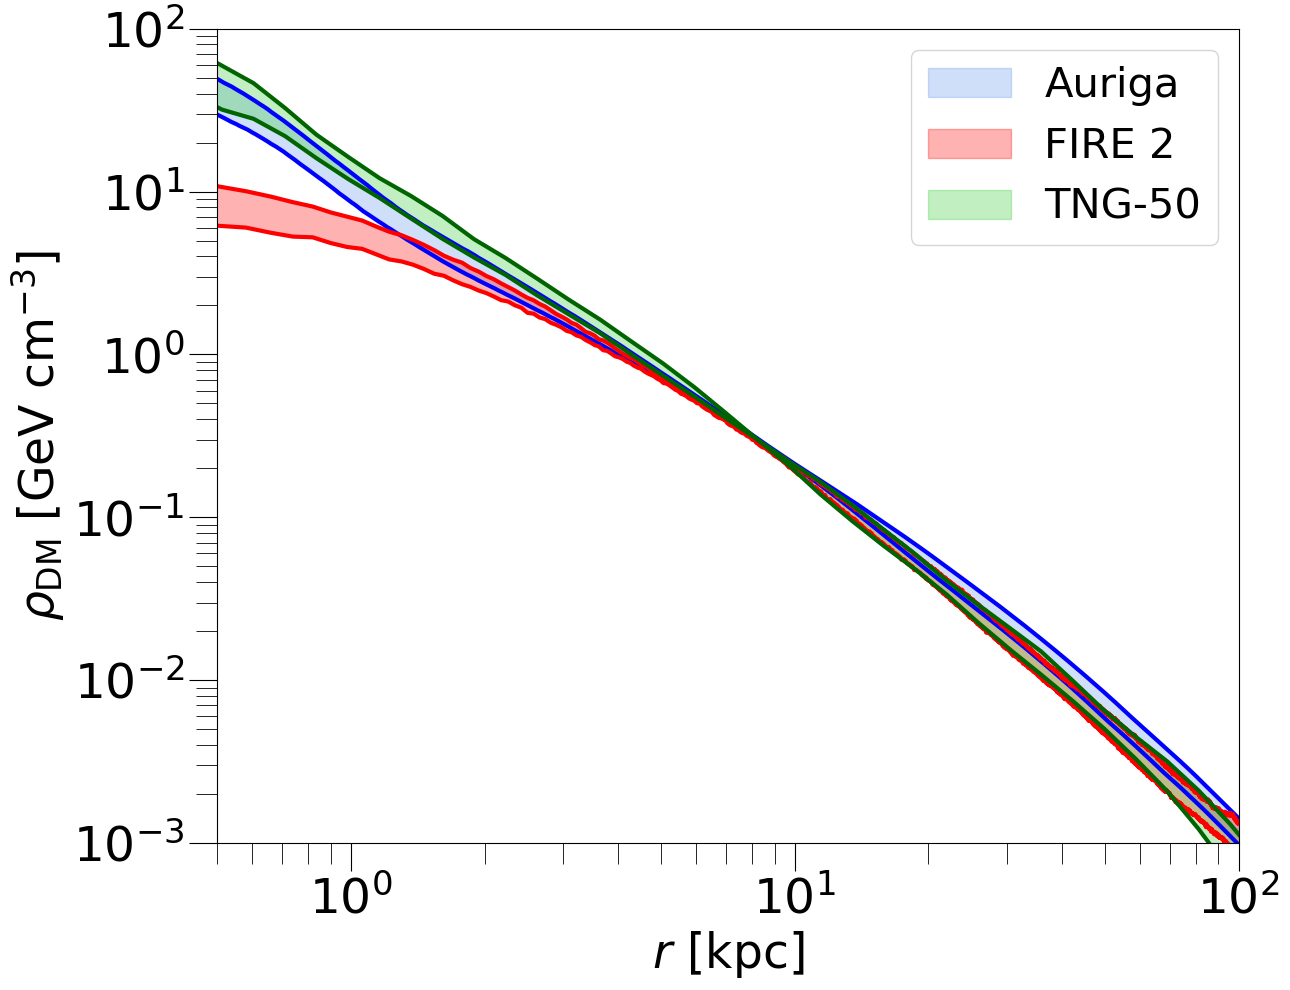

In [35]:
fig, axs = plt.subplots(1,1,figsize =(13,10))

#Define parameters for the plot
a = 0.3
al =  1
lw = 3

axs.fill_between(r_Auriga[1:], Auriga_y_lower, Auriga_y_upper, color='cornflowerblue', alpha=a, label='Auriga') 
axs.plot(r_Auriga[1:], Auriga_y_lower, color='blue', linewidth=lw, linestyle='solid', alpha=al)  # Lower edge
axs.plot(r_Auriga[1:],Auriga_y_upper, color='blue', linewidth=lw, linestyle='solid', alpha=al)  # Upper edge

axs.fill_between(r_FIRE[1:], FIRE_y_lower, FIRE_y_upper, color='red', alpha=a, label='FIRE 2')
axs.plot(r_FIRE[1:], FIRE_y_lower, color='red', linewidth=lw, linestyle='solid', alpha=al)  # Lower edge
axs.plot(r_FIRE[1:], FIRE_y_upper, color='red', linewidth=lw, linestyle='solid', alpha=al)  # Upper edge

axs.fill_between(r_plot[:-1], TNG_50_y_lower, TNG_50_y_upper, color='limegreen', alpha=a, label='TNG-50')
axs.plot(r_plot[:-1], TNG_50_y_lower, color='darkgreen', linewidth=lw, linestyle='solid', alpha=al)  # Lower edge
axs.plot(r_plot[:-1], TNG_50_y_upper, color='darkgreen', linewidth=lw, linestyle='solid', alpha=al)  # Upper edge


axs.set_xlim(0.5,10**2)
axs.set_ylim(10**-3,10**2)
axs.set_xlabel(r'$r$ [kpc]', fontsize=34)
axs.set_ylabel(r'$\rho_{\mathrm{DM}} \ [\mathrm{GeV} \ \mathrm{cm}^{-3}]$', fontsize=34)
axs.set_xscale('log')
axs.set_yscale('log')

axs.tick_params(axis='both', which='minor', labelsize=35,size = 15)
axs.tick_params(axis='both', which='major', labelsize=35,size = 20)
axs.legend(fontsize=30,loc='upper right')
fig.tight_layout()